## Assignment 5 - Multi Linear Regression
### Problem 1
Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R<sup>2</sup> value for each prepared model.
<table>
<tr>
    <td>R&D Spend</td>
    <td>Research and devolop spend in the past few years</td>
</tr>
<tr>
    <td>Administration</td>
    <td>Spend on administration in the past few years</td>
</tr>
<tr>
    <td>Marketing Spend</td>
    <td>Spend on Marketing in the past few years</td>
</tr>
<tr>
    <td>State</td>
    <td>States from which data is collected</td>
</tr>
<tr>
    <td>Profit</td>
    <td>profit of each state in the past few years</td>
</tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import statsmodels.formula.api as smf
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df_raw=pd.read_csv('50_Startups.csv')
df=df_raw.rename(columns={'R&D Spend' : 'rd_spend', 'Marketing Spend' : 'mrktng_spend'})

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   rd_spend        50 non-null     float64
 1   Administration  50 non-null     float64
 2   mrktng_spend    50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<AxesSubplot:>

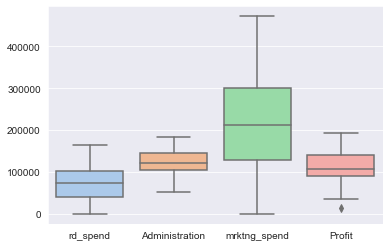

In [4]:
#no null values in the dataset
sns.boxplot(data=df, palette='pastel')

## Investigating the Relationships
Various features available are plotted against each other to paint a better picture about their relationship against Profit

In [5]:
from matplotlib import pyplot as plt

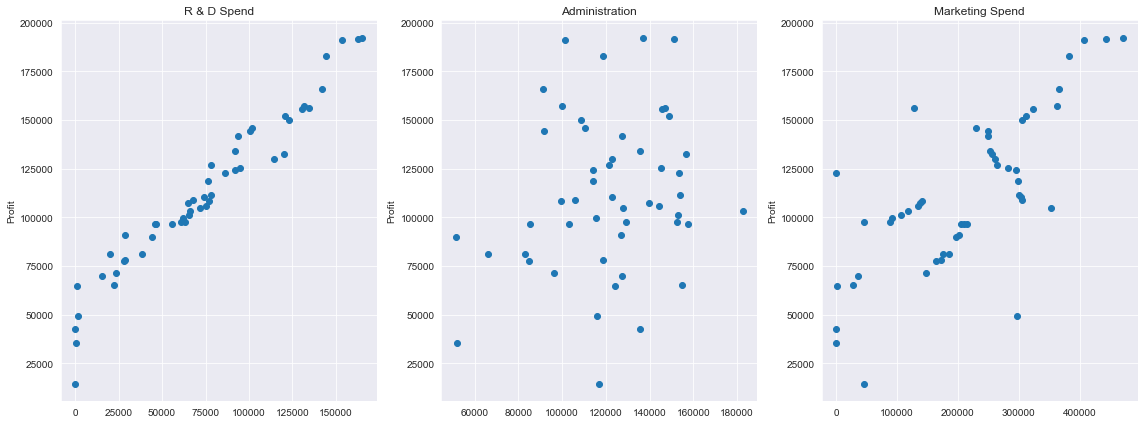

In [6]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['rd_spend'],df['Profit'],'o')
axes[0].set_ylabel("Profit")
axes[0].set_title("R & D Spend")

axes[1].plot(df['Administration'],df['Profit'],'o')
axes[1].set_title("Administration")
axes[1].set_ylabel("Profit")

axes[2].plot(df['mrktng_spend'],df['Profit'],'o')
axes[2].set_title("Marketing Spend");
axes[2].set_ylabel("Profit")
plt.tight_layout();

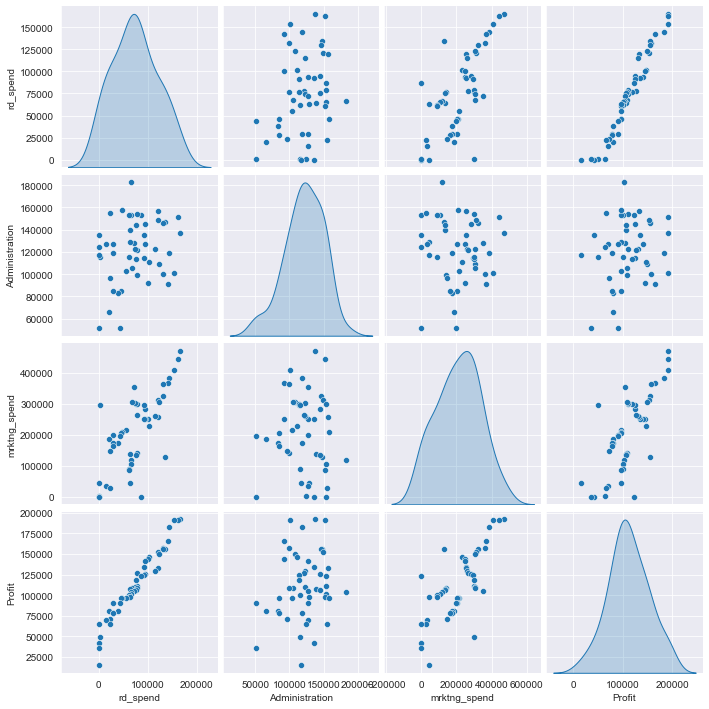

In [7]:
sns.pairplot(df, diag_kind='kde', palette='muted')

In [8]:
df.corr()

rd_spend  Administration  mrktng_spend    Profit
rd_spend        1.000000        0.241955      0.724248  0.972900
Administration  0.241955        1.000000     -0.032154  0.200717
mrktng_spend    0.724248       -0.032154      1.000000  0.747766
Profit          0.972900        0.200717      0.747766  1.000000

### Creating the Model

In [9]:
model = smf.ols('Profit~rd_spend+Administration+mrktng_spend',data=df).fit()

In [10]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           4.53e-30
Time:                        09:38:19   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_spend           0.8057      0.045     17.846      0.000       0.715       0.897
Administration    -0.0268      0.051     -0.526      0.602      -0.130       0.076
mrktng_spend       0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

We can see that only R&D Spend contribute much to the model. Rest of the variables have p values greater than 0.05.
Let us see some Simple Linear Regression models for variables individually.

### Model for Profit prediction using only R&D Spend

In [11]:
model1 = smf.ols('Profit~rd_spend',data=df).fit()

In [12]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           3.50e-32
Time:                        09:38:19   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
rd_spend       0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It is evident that R&D Spend alone can account for 94.7% variance in Proft and can be used to make a good model.
Now let's go on to make a model with the Marketing Spend value.

### Model for Profit prediction using only Marketing Spend

In [13]:
model2 = smf.ols('Profit~mrktng_spend',data=df).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           4.38e-10
Time:                        09:38:19   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept         6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
mrktng_spend     0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Evidently Marketing Spend is a good predictor of Profit as it can account for around 55% variance in Profit. But contribute too little in the combined model.

### Model for Profit prediction using R&D Spend and Marketing Spend

In [14]:
model3 = smf.ols('Profit~rd_spend+mrktng_spend',data=df).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     450.8
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           2.16e-31
Time:                        09:38:19   Log-Likelihood:                -525.54
No. Observations:                  50   AIC:                             1057.
Df Residuals:                      47   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.698e+04   2689.933     17.464      0.000    4.16e+04    5.24e+04
rd_spend         0.7966      0.041     19.266      0.000       0.713       0.880
mrktng_spend     0.0299      0.016      1.927      0.060      -0.001       0.061
==============================================================================
Omnibus:                       14.677   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.161
Skew:                          -0.939   Prob(JB):                     2.54e-05
Kurtosis:                       5.575   Cond. No.                     5.32e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.32e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well, it seems that when combined, Marketing Spend doe not provide much to the model. Probably because of auto-correlation. 

Let's try Residual analysis and Model deltion diagnostics with Model 1 and Model 3 to make the most out of them and then we can finalize on a final model.

# Residual Analysis
## Test for Normality

### QQ Plots - Model 1

In [15]:
import statsmodels.api as sm

Text(0.5, 1.0, 'Normal QQ Plot for Residuals - Model 1')

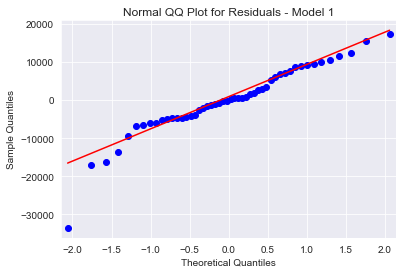

In [16]:
sm.qqplot(model.resid, line='q')
plt.title('Normal QQ Plot for Residuals - Model 1')

### QQ Plot - Model 3

Text(0.5, 1.0, 'Normal QQ Plot for Residuals - Model 3')

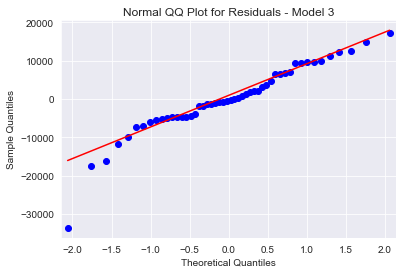

In [17]:
sm.qqplot(model3.resid, line='q')
plt.title('Normal QQ Plot for Residuals - Model 3')

Test for normality reveals that the qq plots for Model 1 and Model 3 looks almost the same and is good enough.

## Residual Plot for Homoscedasticity
#### Model 1:

In [18]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

Text(0, 0.5, 'Standardized residual values')

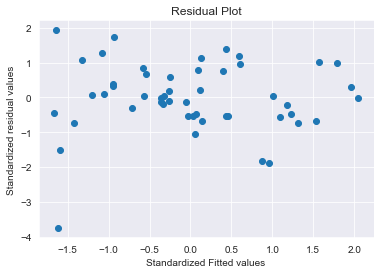

In [19]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

#### Model 3:

Text(0, 0.5, 'Standardized residual values')

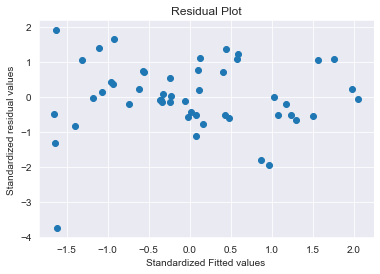

In [20]:
plt.scatter(get_standardized_values(model3.fittedvalues),
            get_standardized_values(model3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

## Residuals vs. Regressors
#### Model 1

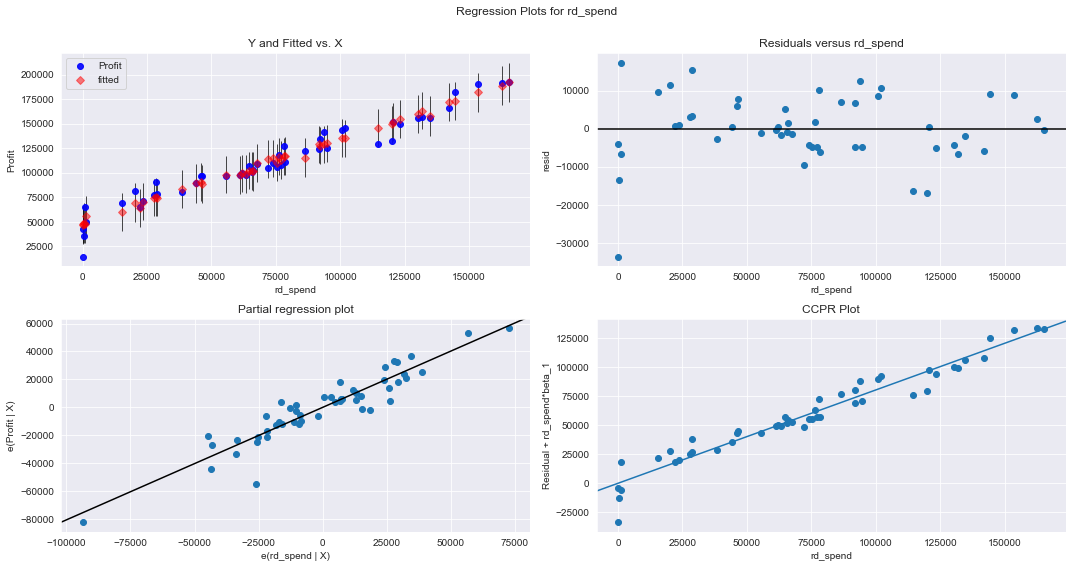

In [21]:
# R&D Spend:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "rd_spend", fig=fig)
plt.show()

We can see that R&D Spend is a good tool for creating a model to predict Profit.

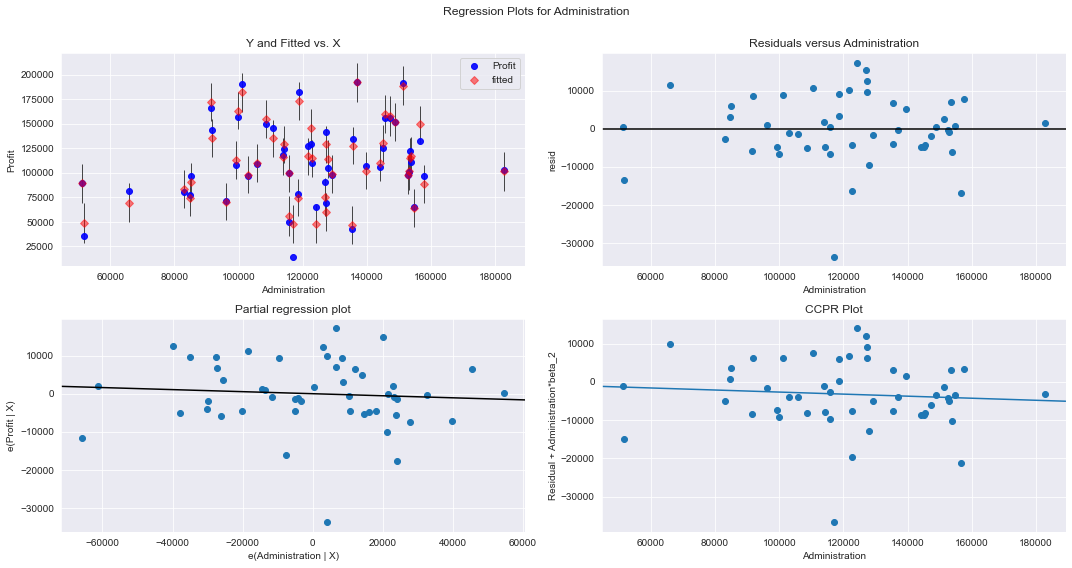

In [22]:
# Administration:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Administration", fig=fig)
plt.show()

The distribution is not at all uniform. Administration is better excluded from the final model.

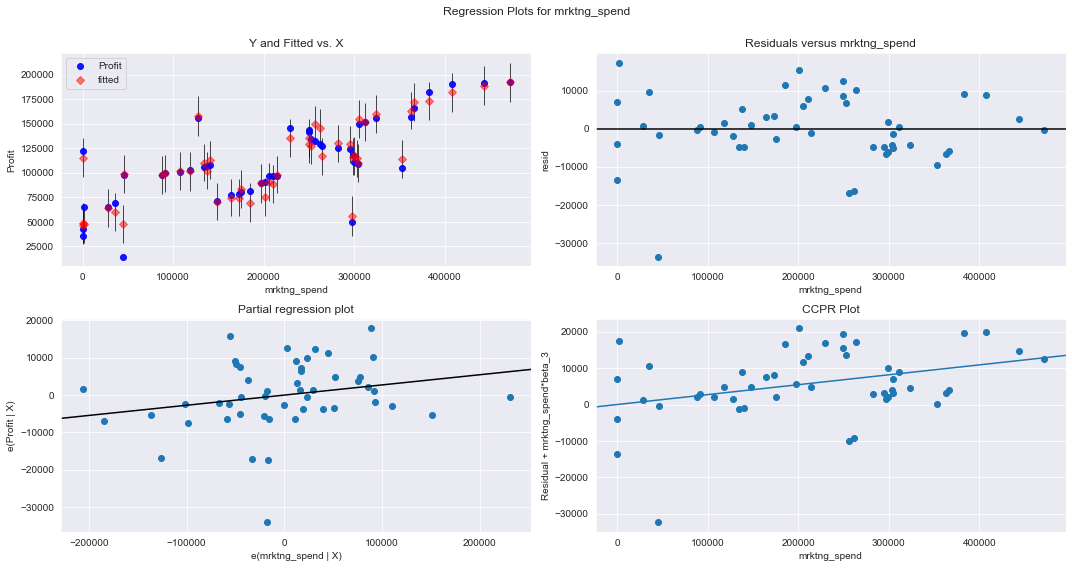

In [23]:
# Marketing Spend:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "mrktng_spend", fig=fig)
plt.show()

Marketing Spend could be cleaned to make it a better tool for the model.

## Model Deletion Diagnostics
## Detecting Influencers/Outliers
### Cookâ€™s Distance:

In [24]:
model_influence = model3.get_influence()
(c, _) = model_influence.cooks_distance

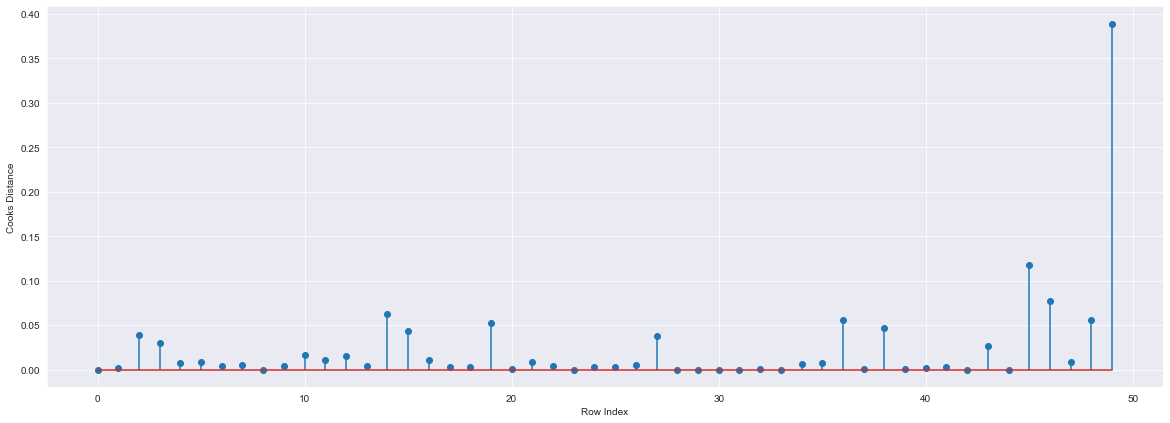

In [25]:
#Plotting the influencer values using a stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

We can remove the argument corresponding to the maximum value.

In [26]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.3894886227924924)

## High Influence Points:

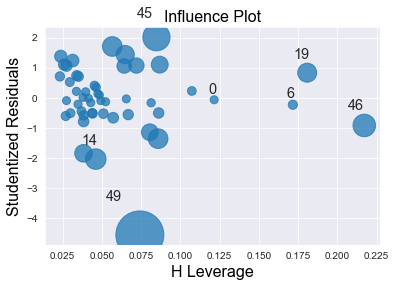

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model3)
plt.show()

The Influence Plot coincides with our inference from what we found out from the Stem Plot. 

In [28]:
df[df.index.isin([19,45,46,47,48,49])]

rd_spend  Administration  mrktng_spend       State     Profit
19  86419.70       153514.11          0.00    New York  122776.86
45   1000.23       124153.04       1903.93    New York   64926.08
46   1315.46       115816.21     297114.46     Florida   49490.75
47      0.00       135426.92          0.00  California   42559.73
48    542.05        51743.15          0.00    New York   35673.41
49      0.00       116983.80      45173.06  California   14681.40

We can see that the above points are outliers and needs to be removed.

In [29]:
#Discard the data points which are influencers and reasign the row number (reset_index())
finaldf=df.drop(df.index[[46,49]],axis=0).reset_index()

## Building the Final Model
Using the cleaned data with the influencers removed and using the variables that yield most to the model.

In [30]:
final_model = smf.ols('Profit~rd_spend+mrktng_spend',data=finaldf).fit()
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     544.5
Date:                Tue, 29 Jun 2021   Prob (F-statistic):           2.94e-32
Time:                        09:38:22   Log-Likelihood:                -495.55
No. Observations:                  48   AIC:                             997.1
Df Residuals:                      45   BIC:                             1003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.017e+04   2333.087     21.505      0.000    4.55e+04    5.49e+04
rd_spend         0.7512      0.039     19.431      0.000       0.673       0.829
mrktng_spend     0.0353      0.014      2.511      0.016       0.007       0.064
==============================================================================
Omnibus:                        0.134   Durbin-Watson:                   1.578
Prob(Omnibus):                  0.935   Jarque-Bera (JB):                0.313
Skew:                          -0.091   Prob(JB):                        0.855
Kurtosis:                       2.649   Cond. No.                     5.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Checking for any influencers in the Final Model
### Cook's distance

In [31]:
model_influence = final_model.get_influence()
(c, _) = model_influence.cooks_distance

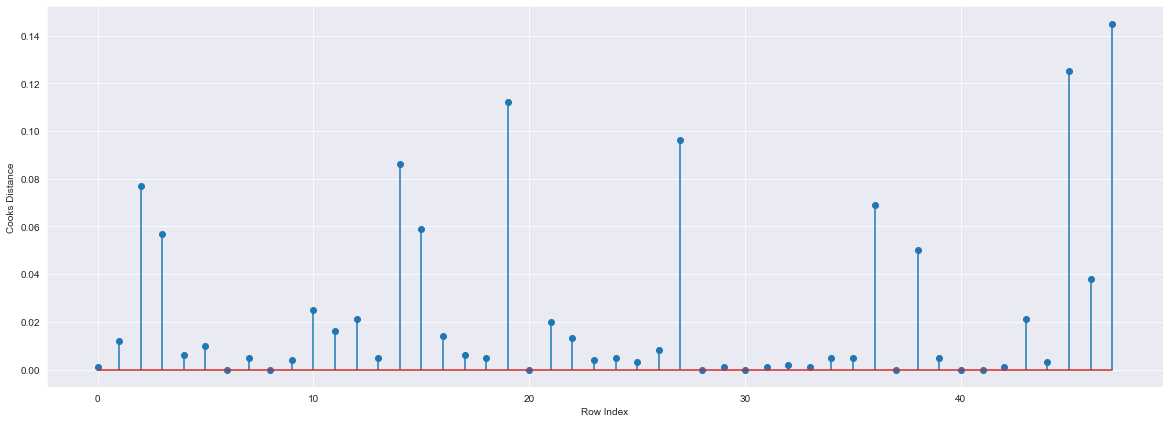

In [32]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(finaldf)),np.round(c,3));
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance');

The stem plot is Satisfactory as it reveals no influences 

## Predicting New Values

In [34]:
p_df=pd.DataFrame({'rd_spend':150000,"mrktng_spend":400000},index=[1])
p_df

rd_spend  mrktng_spend
1    150000        400000

In [35]:
final_model.predict(p_df)

1    176965.593645
dtype: float64